### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

### Read the Data

In [2]:
data = pd.read_csv('Data/Online Retail.csv')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,542504,37413,NaN,5568,28/01/2011 12:03,0.00,NaN,United Kingdom
1,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,27/10/2011 12:26,0.21,12901.0,United Kingdom
2,554868,22197,SMALL POPCORN HOLDER,4300,27/05/2011 10:52,0.72,13135.0,United Kingdom
3,556231,85123A,?,4000,09/06/2011 15:04,0.00,NaN,United Kingdom
4,544612,22053,EMPIRE DESIGN ROSETTE,3906,22/02/2011 10:43,0.82,18087.0,United Kingdom
5,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,19/07/2011 17:04,0.06,14609.0,United Kingdom
6,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,11/01/2011 12:55,2.10,15749.0,United Kingdom
7,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,18/04/2011 13:20,2.10,15749.0,United Kingdom
8,560040,23343,came coded as 20713,3100,14/07/2011 14:28,0.00,NaN,United Kingdom
9,546139,84988,?,3000,09/03/2011 16:35,0.00,NaN,United Kingdom


### Cleaning Data

In [4]:
data['UnitPrice'].min()

0.0

In [5]:
data['UnitPrice'].max()

649.5

In [6]:
data[data['UnitPrice'] == 649.5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11758,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,10/06/2011 15:28,649.5,15098.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    99999 non-null  int64  
 1   StockCode    99999 non-null  object 
 2   Description  99772 non-null  object 
 3   Quantity     99999 non-null  int64  
 4   InvoiceDate  99999 non-null  object 
 5   UnitPrice    99999 non-null  float64
 6   CustomerID   94764 non-null  float64
 7   Country      99999 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [8]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description     227
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     5235
Country           0
dtype: int64

In [10]:
cleaned_data = data.dropna(subset=['CustomerID', 'Description'])

cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])

cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

cleaned_data.to_csv('cleaned_customer_data.csv', index=False)

customer_data = cleaned_data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique transactions (orders) per customer
    'Quantity': 'sum',       # Total quantity of products purchased by each customer
    'TotalPrice': 'sum'      # Total spending by each customer
}).rename(columns={'InvoiceNo': 'TotalOrders'})

customer_data.reset_index(inplace=True)

customer_data.to_csv('cleaned_data.csv', index=False)

customer_data.head()

/var/folders/_b/ygjd3hwd5wj6hwcczmfy35gh0000gn/T/ipykernel_13282/888293198.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
/var/folders/_b/ygjd3hwd5wj6hwcczmfy35gh0000gn/T/ipykernel_13282/888293198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])
/var/folders/_b/ygjd3hwd5wj6hwcczmfy35gh0000gn/T/ipykernel_13282/888293198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,CustomerID,TotalOrders,Quantity,TotalPrice
0,12347.0,7,1702,1989.26
1,12348.0,4,2332,1437.24
2,12349.0,1,162,158.44
3,12350.0,1,180,268.20
4,12352.0,5,216,286.56


### Scaling Numerical Values

#### StandardScaler

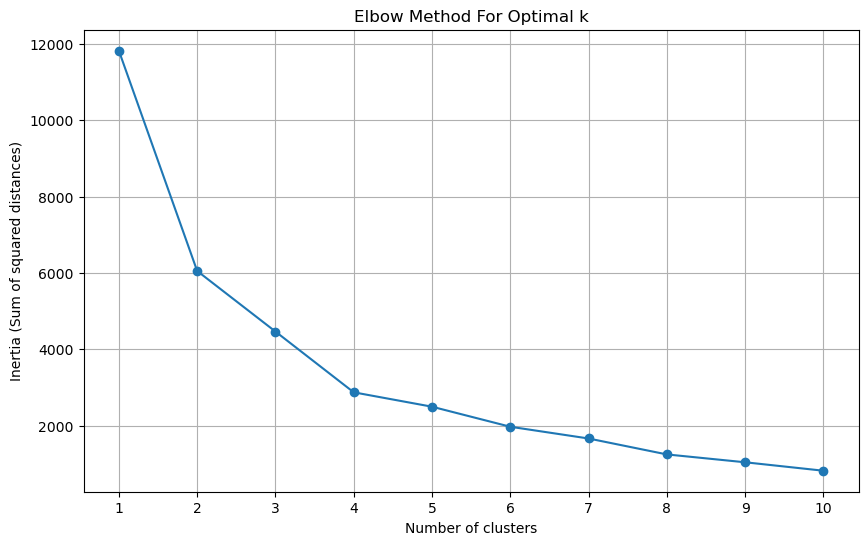

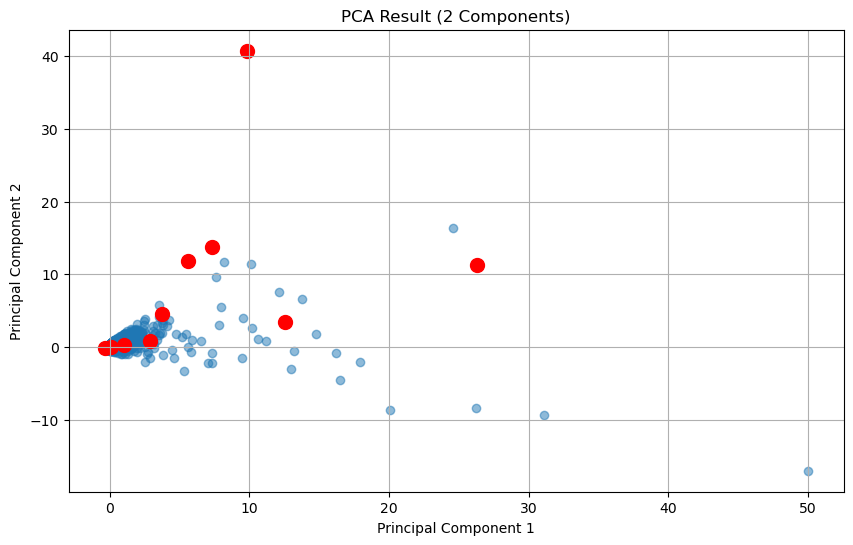

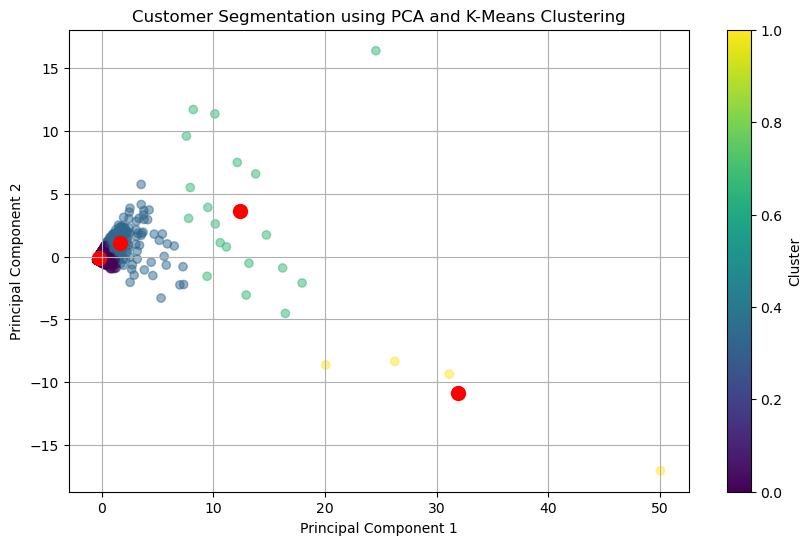

0.7905057396966444

In [9]:
# Normalize data

scaler = StandardScaler()
scaled_customer_data = scaler.fit_transform(customer_data[['TotalOrders', 'Quantity', 'TotalPrice']])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying PCA to reduce dimensions while capturing as much variance as possible
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_customer_data = pca.fit_transform(scaled_customer_data)

# Plotting the PCA result to visualize the distribution
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance explained by each component
pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_customer_data)

# Assign clusters back to the customer data
customer_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Customer Segmentation using PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-means clustering
silhouette_avg = silhouette_score(pca_customer_data, kmeans.labels_)

silhouette_avg

#### MinMaxScaler

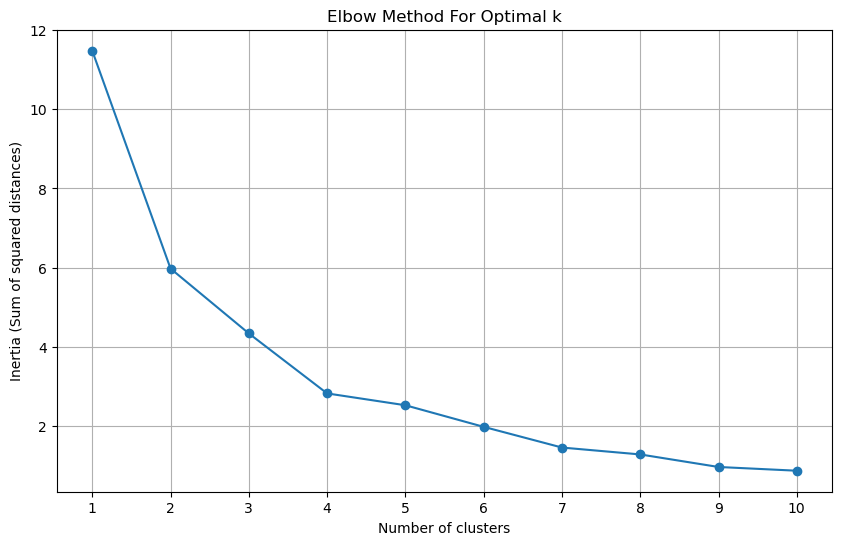

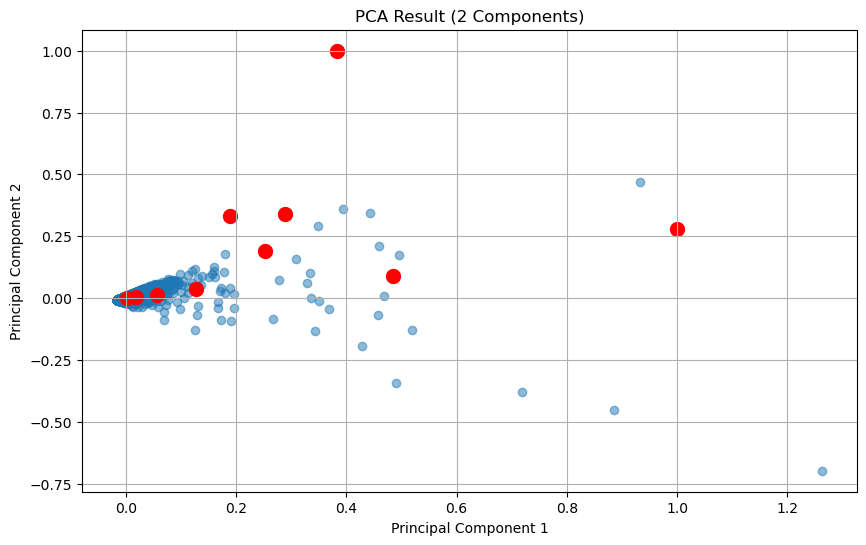

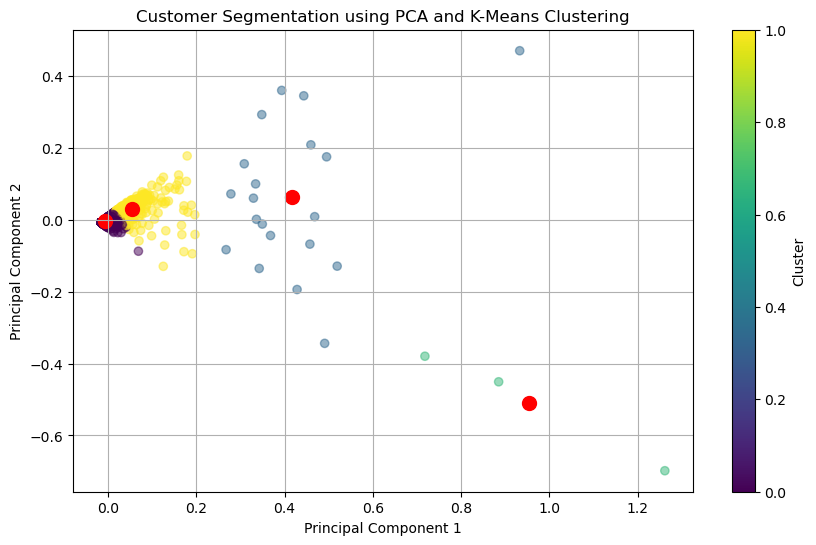

0.7771407814839499

In [10]:
# Normalize data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_customer_data = scaler.fit_transform(customer_data[['TotalOrders', 'Quantity', 'TotalPrice']])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying PCA to reduce dimensions while capturing as much variance as possible
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_customer_data = pca.fit_transform(scaled_customer_data)

# Plotting the PCA result to visualize the distribution
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance explained by each component
pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_customer_data)

# Assign clusters back to the customer data
customer_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Customer Segmentation using PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-means clustering
silhouette_avg = silhouette_score(pca_customer_data, kmeans.labels_)

silhouette_avg

#### MaxAbsScaler

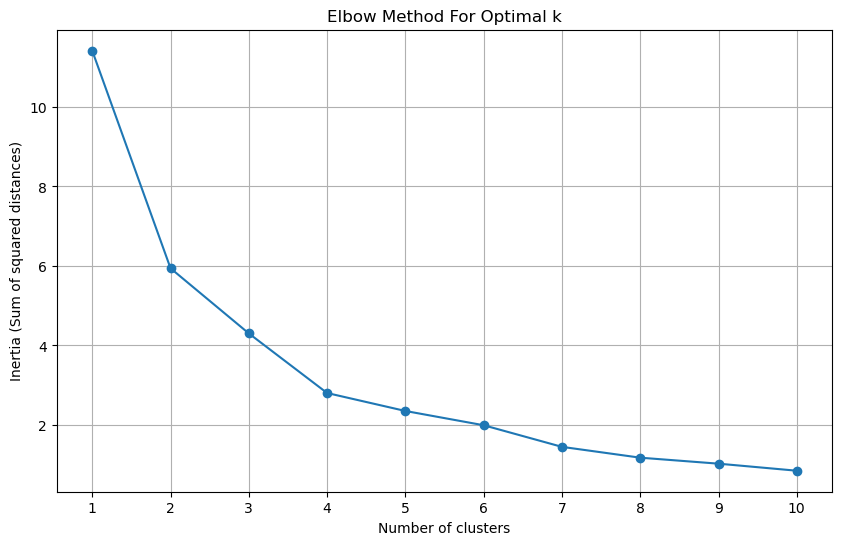

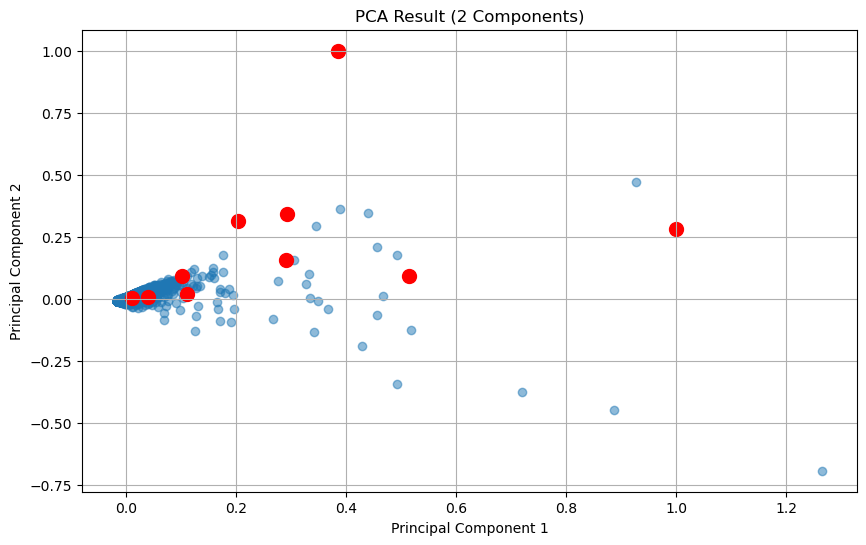

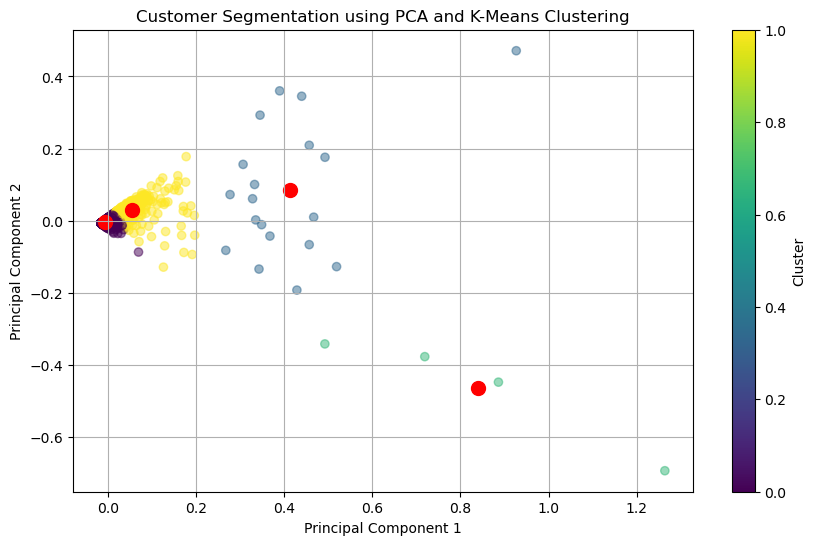

0.777066198721637

In [11]:
# Normalize data

scaler = MaxAbsScaler()
scaled_customer_data = scaler.fit_transform(customer_data[['TotalOrders', 'Quantity', 'TotalPrice']])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying PCA to reduce dimensions while capturing as much variance as possible
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_customer_data = pca.fit_transform(scaled_customer_data)

# Plotting the PCA result to visualize the distribution
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance explained by each component
pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_customer_data)

# Assign clusters back to the customer data
customer_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Customer Segmentation using PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-means clustering
silhouette_avg = silhouette_score(pca_customer_data, kmeans.labels_)

silhouette_avg

#### RobustScaler

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

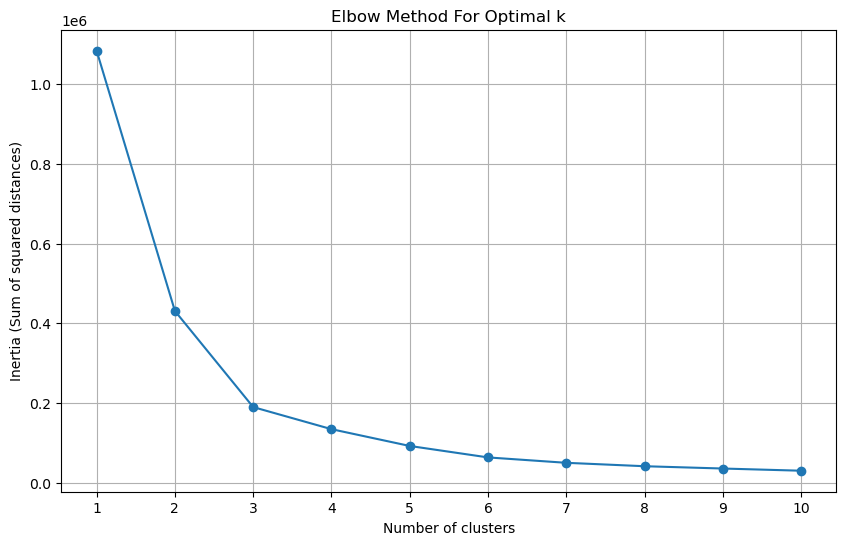

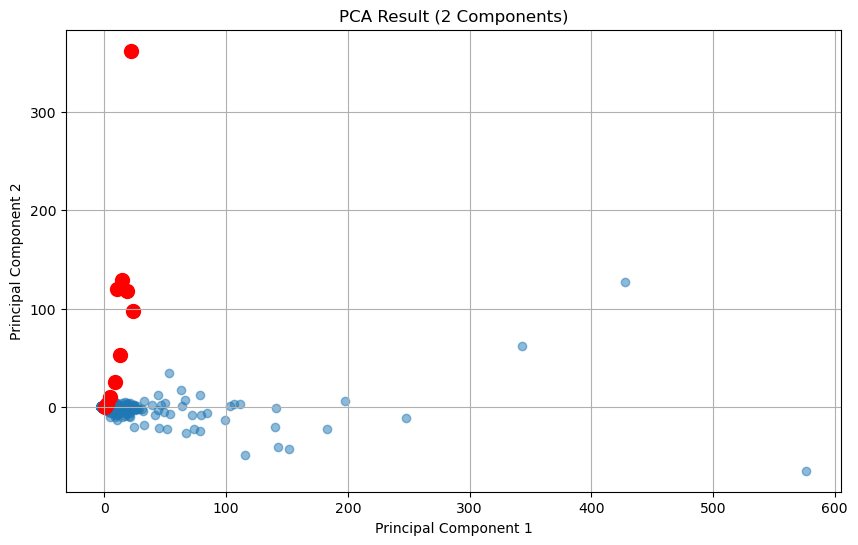

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Average Total Orders  Average Quantity  Average Total Price
Cluster                                                             
0                    3.535121        637.596169           782.474743
1                   57.000000     110010.000000        241378.400000
2                   44.818182      37220.409091         54556.553636


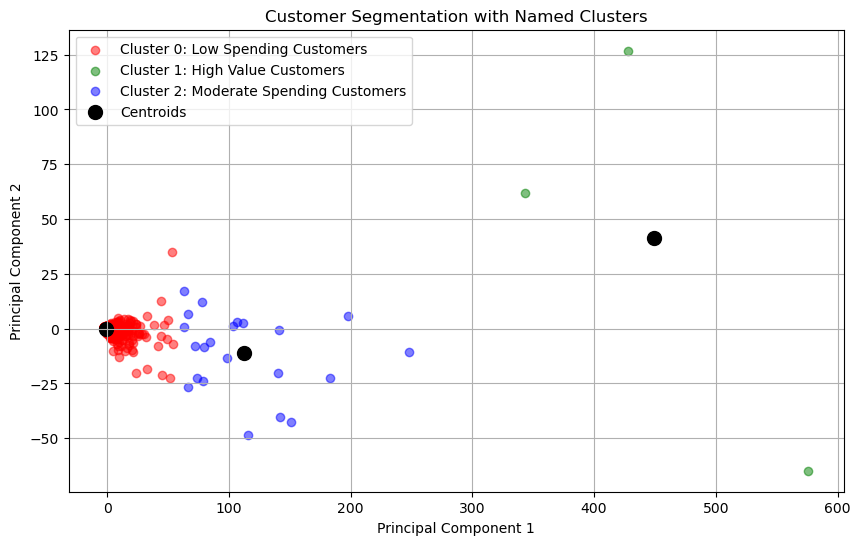

0.971260398602914


In [11]:
# Normalize data
scaler = RobustScaler()
scaled_customer_data = scaler.fit_transform(customer_data[['TotalOrders', 'Quantity', 'TotalPrice']])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying PCA to reduce dimensions while capturing as much variance as possible
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_customer_data = pca.fit_transform(scaled_customer_data)

# Plotting the PCA result to visualize the distribution
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance explained by each component
pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_customer_data)

# Assign clusters back to the customer data
customer_data['Cluster'] = kmeans.labels_

# Calculate mean values for each cluster to understand their characteristics
cluster_analysis = customer_data.groupby('Cluster').agg({
    'TotalOrders': 'mean',
    'Quantity': 'mean',
    'TotalPrice': 'mean'
}).rename(columns={
    'TotalOrders': 'Average Total Orders',
    'Quantity': 'Average Quantity',
    'TotalPrice': 'Average Total Price'
})

print(cluster_analysis)

cluster_names = {
    0: 'Low Spending Customers',
    1: 'High Value Customers',
    2: 'Moderate Spending Customers'
}
customer_data['Customer Segment'] = customer_data['Cluster'].map(cluster_names)

# Unique colors for clusters
colors = np.array(['red', 'green', 'blue'])

plt.figure(figsize=(10, 6))
for cluster in np.unique(customer_data['Cluster']):
    # Select only data rows where cluster is equal to the current loop cluster
    cluster_data = pca_customer_data[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster], label=f'Cluster {cluster}: {cluster_names[cluster]}', alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Segmentation with Named Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-means clustering
silhouette_avg = silhouette_score(pca_customer_data, kmeans.labels_)

print(silhouette_avg)

customer_data.head()

customer_data.to_csv('processed_customer_data.csv', index=False)

#### Quantile Transformer

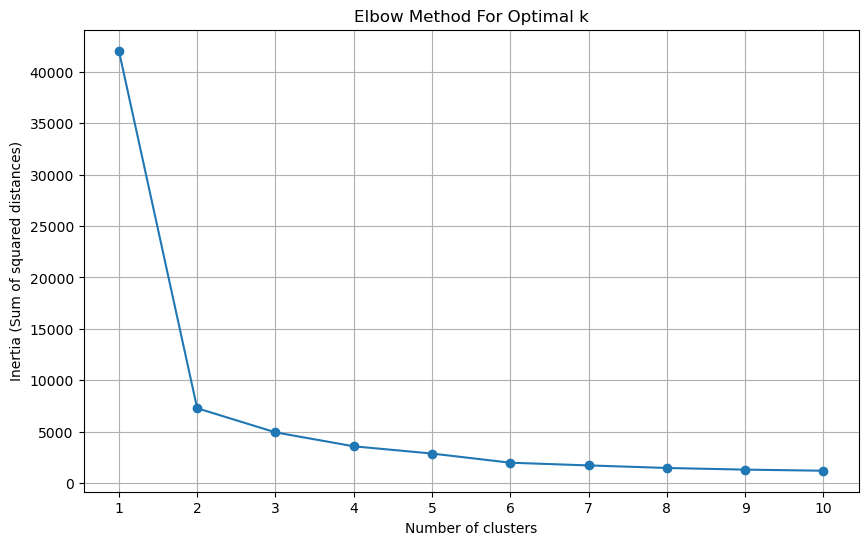

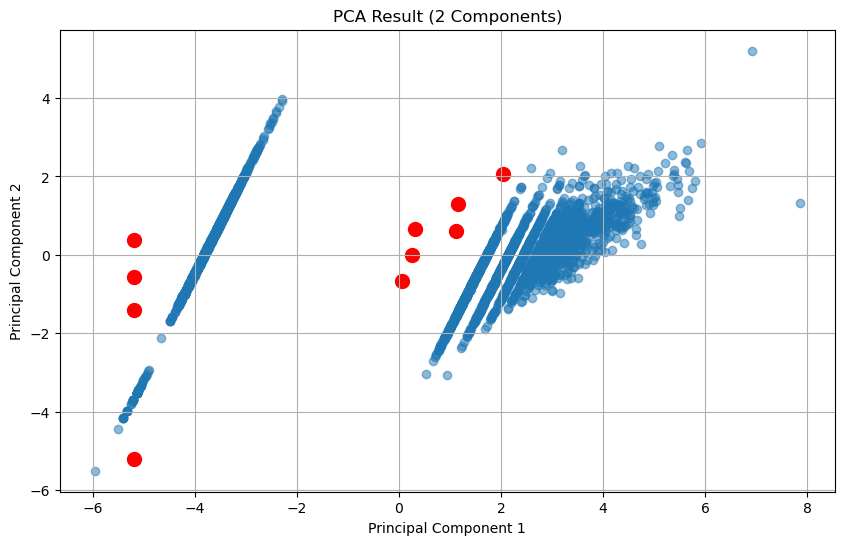

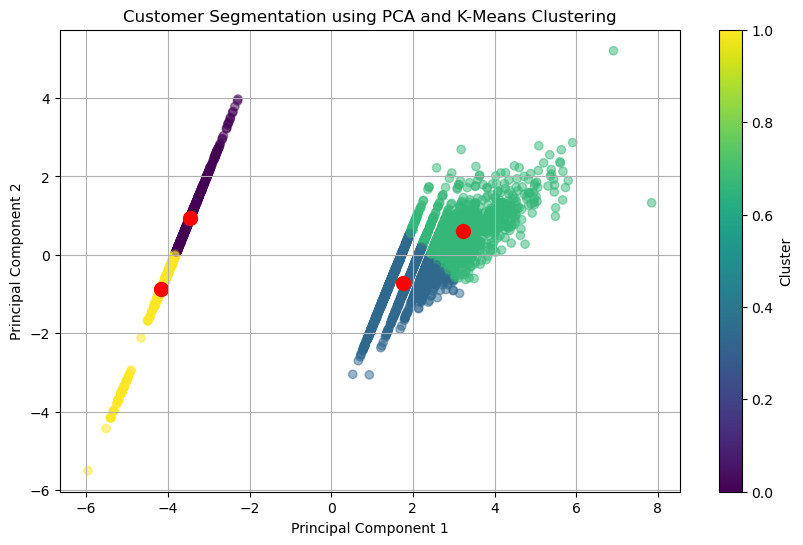

0.49737376497307073

In [17]:
# Normalize data

scaler = QuantileTransformer(output_distribution='uniform') # or 'normal'
scaled_customer_data = scaler.fit_transform(customer_data[['TotalOrders', 'Quantity', 'TotalPrice']])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying PCA to reduce dimensions while capturing as much variance as possible
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_customer_data = pca.fit_transform(scaled_customer_data)

# Plotting the PCA result to visualize the distribution
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance explained by each component
pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_customer_data)

# Assign clusters back to the customer data
customer_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Customer Segmentation using PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-means clustering
silhouette_avg = silhouette_score(pca_customer_data, kmeans.labels_)

silhouette_avg

#### PowerTransformer 

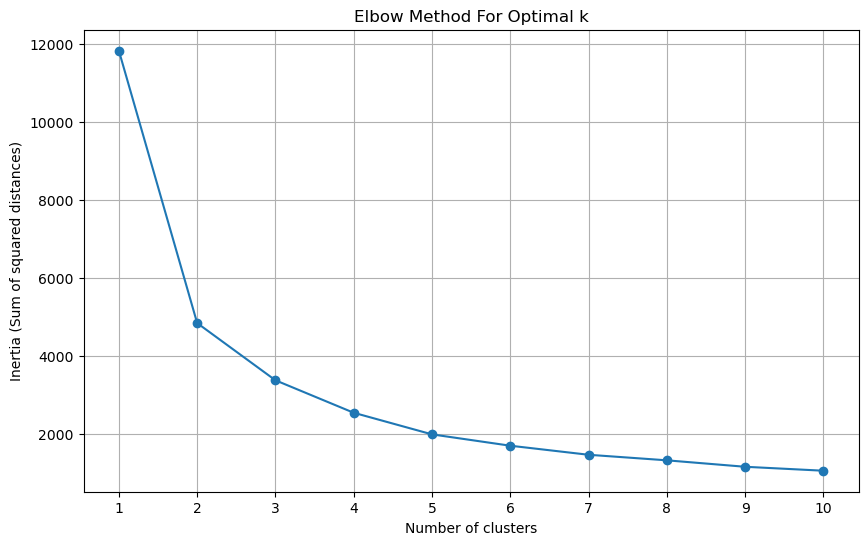

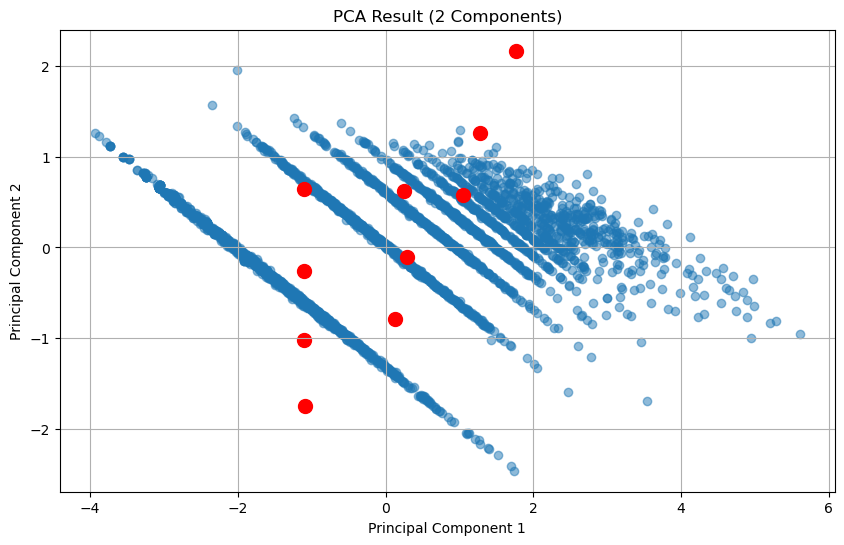

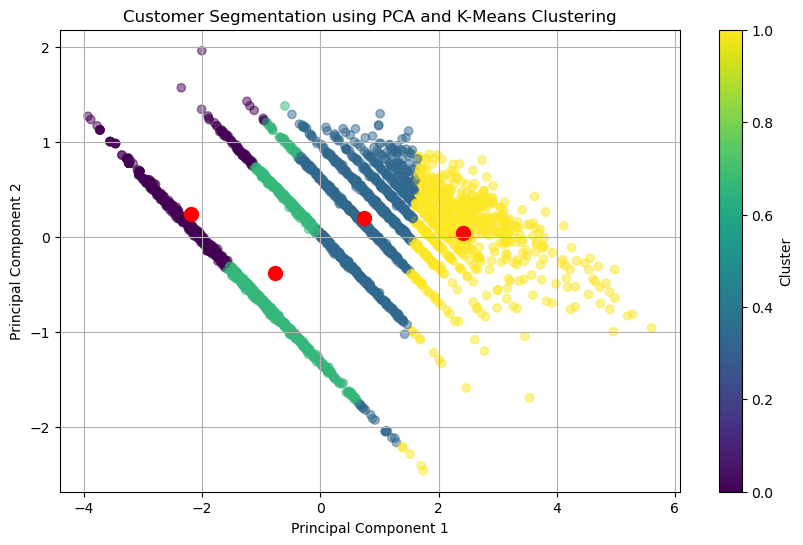

0.39379224115088374

In [16]:
# Normalize data

scaler = PowerTransformer(method='yeo-johnson') # or 'box-cox'
scaled_customer_data = scaler.fit_transform(customer_data[['TotalOrders', 'Quantity', 'TotalPrice']])

# Determine the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_customer_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Applying PCA to reduce dimensions while capturing as much variance as possible
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
pca_customer_data = pca.fit_transform(scaled_customer_data)

# Plotting the PCA result to visualize the distribution
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Variance explained by each component
pca.explained_variance_ratio_

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_customer_data)

# Assign clusters back to the customer data
customer_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_customer_data[:, 0], pca_customer_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Customer Segmentation using PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-means clustering
silhouette_avg = silhouette_score(pca_customer_data, kmeans.labels_)

silhouette_avg

### Save Model

In [12]:
import joblib

# Save the trained models
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(pca, 'pca.joblib')
joblib.dump(kmeans, 'kmeans.joblib')

# Save the cluster labels dictionary
joblib.dump(cluster_names, 'cluster_names.joblib')

print("Models and cluster names saved successfully!")

Models and cluster names saved successfully!
